# Spinup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from dask.diagnostics import ProgressBar
import warnings
warnings.filterwarnings("ignore")

In [2]:
from yamlparser import YAMLParser, read_parameterized_runs, read_unparameterized_runs, read_offline_runs

In [3]:
yp = YAMLParser()

In [4]:
## read parameterized runs
exps_param = yp.read('/glade/u/home/noraloose/GL90_paper/config_param.yaml')
%time exps_param = read_parameterized_runs(exps_param)

nw2_0.5deg_N15_KHTH800
nw2_0.5deg_N15_KHGL800_hbbl5
nw2_0.5deg_N15_KHTH800_vary
nw2_0.5deg_N15_KHGL800_vary_hbbl5
nw2_0.5deg_N15_EBT_KHTH800
nw2_0.5deg_N15_EBT_KHGL800_hbbl5
nw2_0.25deg_N15_KHTH300
nw2_0.25deg_N15_KHGL300_hbbl1
nw2_0.25deg_N15_KHGL300_hbbl5
nw2_0.25deg_N15_KHGL300_hbbl20
nw2_0.25deg_N15_KHGL300
nw2_0.25deg_N15_KHTH800
nw2_0.25deg_N15_KHGL800_hbbl5
nw2_0.25deg_N15_KHTH300_vary
nw2_0.25deg_N15_KHGL300_vary_hbbl5
nw2_0.25deg_N15_EBT_KHTH300
nw2_0.25deg_N15_EBT_KHGL300_hbbl5
nw2_0.125deg_N15_KHTH100
nw2_0.125deg_N15_KHGL100_hbbl5
nw2_0.125deg_N15_KHTH800
nw2_0.125deg_N15_KHGL800_hbbl5
nw2_0.125deg_N15_KHTH100_vary
nw2_0.125deg_N15_KHGL100_vary_hbbl5
nw2_0.125deg_N15_EBT_KHTH100
nw2_0.125deg_N15_EBT_KHGL100_hbbl5
CPU times: user 10.9 s, sys: 1.41 s, total: 12.3 s
Wall time: 2min 13s


In [11]:
# read unparameterized runs
exps_unparam = yp.read('/glade/u/home/noraloose/GL90_paper/config_unparam.yaml')
%time exps_unparam = read_unparameterized_runs(exps_unparam)

CPU times: user 1.1 s, sys: 558 ms, total: 1.66 s
Wall time: 11.6 s


In [12]:
exp_list = [exps_param, exps_unparam]

In [13]:
for exps in exp_list:

    for exp, v in exps.items():
        ds = v['ds']
        ds['hKE'] = ds['h'] * ds['KE']
        dst = ds.mean(dim='time', keep_attrs=True)
        v['dst'] = dst

## Spin-up plots

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'font.size': 12}
pylab.rcParams.update(params)

In [15]:
def plot_spinup(vlist, colorlist, abc_list = ['(a)', '(b)'], maxtime=77000, intertime=None, ncol=4, compute_energy_levels=False):

    fig, axs = plt.subplots(1, 2, figsize=(13,4))

    for v, color in zip(vlist, colorlist):
        print(v['label'])
        os = v['os']
        ds = v['ds']
        label = v['label']
        timeslice = slice(None, min(os.Time[-1], maxtime))
        os.KE.sum(dim='Layer').sel(Time=timeslice).plot(ax=axs[0], label='_none', linewidth=1.5, color=color, alpha=0.3)

        KE_rolling_mean = os.KE.sum(dim='Layer').rolling(Time=100, center=True).mean()
        KE_rolling_mean.sel(Time=timeslice).plot(ax=axs[0], label=label, linewidth=3, color=color)

        os.APE.sum(dim='Interface').sel(Time=timeslice).plot(ax=axs[1] ,label=label, linewidth=3, color=color)
        
        if compute_energy_levels:
            KE_integral = os.KE.sum(dim='Layer').sel(Time=slice(maxtime-2000, maxtime)).mean(dim='Time').values
            print('KE: %g' %KE_integral)
            APE_integral = os.APE.sum(dim='Interface').sel(Time=slice(maxtime-2000, maxtime)).mean(dim='Time').values
            print('APE: %g' %APE_integral)        

    axs[0].set(ylabel = 'Joules', xlabel = 'Time (days)', title='%s Kinetic Energy' %abc_list[0])
    axs[1].set(ylabel = 'Joules', xlabel = 'Time (days)', title='%s Available Potential Energy' %abc_list[1])

    axs[1].legend(bbox_to_anchor=(-0.2, -0.28), loc="center", fontsize=14, ncol=ncol)

    axs[0].grid()
    axs[1].grid()
    axs[0].ticklabel_format(useMathText=True)
    axs[1].ticklabel_format(useMathText=True)
    
    axs[0].axvspan(maxtime-2000, maxtime, facecolor='0.1', alpha=0.2)
    axs[1].axvspan(maxtime-2000, maxtime, facecolor='0.1', alpha=0.2)
    if intertime:
        axs[0].axvspan(intertime-2000, intertime, facecolor='0.1', alpha=0.2)
        axs[1].axvspan(intertime-2000, intertime, facecolor='0.1', alpha=0.2)
        
    axs[0].set_ylim(bottom=0)  
    axs[1].set_ylim(bottom=0)     

    axs[0].set_xlim(left=0)
    axs[1].set_xlim(left=0) 
    axs[0].set_xlim(right=maxtime+500)
    axs[1].set_xlim(right=maxtime+500)   
    
    plt.subplots_adjust(wspace=0.3)  

    return fig

### 1/2 degree main text

1/2$^\circ$ GM 800
KE: 2.57637e+17
APE: 1.34508e+20
1/2$^\circ$ GL 800
KE: 2.68635e+17
APE: 1.3412e+20


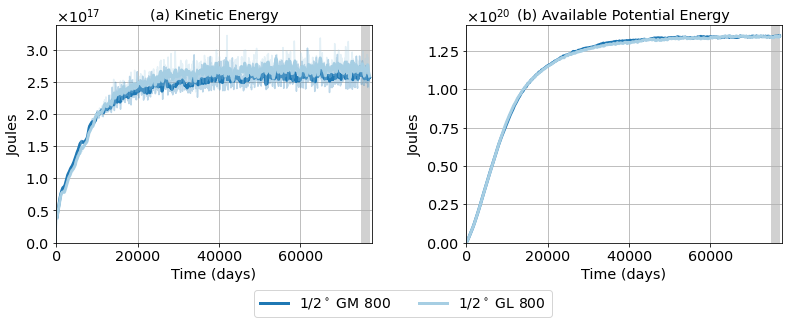

In [29]:
v = exps_param['nw2_0.5deg_N15_KHGL800_hbbl5']
v['label'] = r'1/2$^\circ$ GL 800'
v = exps_param['nw2_0.5deg_N15_KHTH800']
v['label'] = r'1/2$^\circ$ GM 800'

colorlist = ['#1f78b4', '#a6cee3']

vlist = [
    exps_param['nw2_0.5deg_N15_KHTH800'],
    exps_param['nw2_0.5deg_N15_KHGL800_hbbl5']
]

maxtime = 77000
abc_list = ['(a)', '(b)']

fig = plot_spinup(vlist, colorlist, abc_list=abc_list, maxtime=maxtime, intertime=None, ncol=4, compute_energy_levels=True)
plt.savefig('/glade/u/home/noraloose/GL90_paper/figures/spinup_0.5degree.png', dpi=200, bbox_inches='tight', pad_inches=0)

In [17]:
2.68635e+17 / 2.57637e+17  # KE ratio

1.0426879679549133

In [18]:
1.3412e+20 / 1.34508e+20  # APE ratio

0.9971154132096233

### 1/2 degree appendix

1/2$^\circ$ GM 800 $\cdot\, \phi(z)$
KE: 2.97065e+17
APE: 1.05368e+20
1/2$^\circ$ GL 800 $\cdot\, \phi(z)$
KE: 3.1623e+17
APE: 1.04713e+20
1/2$^\circ$ GM 800 $\cdot\, \psi(y)$
KE: 1.48416e+17
APE: 8.70149e+19
1/2$^\circ$ GL 800 $\cdot\, \psi(y)$
KE: 1.50181e+17
APE: 8.66894e+19


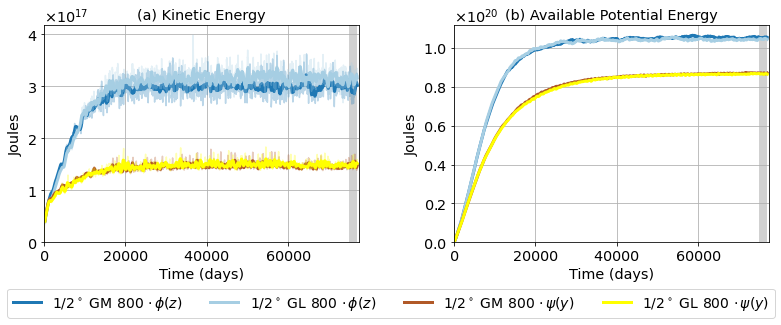

In [28]:
v = exps_param['nw2_0.5deg_N15_KHGL800_vary_hbbl5']
v['label'] = r'1/2$^\circ$ GL 800 $\cdot\, \psi(y)$'
v = exps_param['nw2_0.5deg_N15_KHTH800_vary']
v['label'] = r'1/2$^\circ$ GM 800 $\cdot\, \psi(y)$'
v = exps_param['nw2_0.5deg_N15_EBT_KHGL800_hbbl5']
v['label'] = r'1/2$^\circ$ GL 800 $\cdot\, \phi(z)$'
v = exps_param['nw2_0.5deg_N15_EBT_KHTH800']
v['label'] = r'1/2$^\circ$ GM 800 $\cdot\, \phi(z)$'

colorlist = [ '#1f78b4','#a6cee3', '#b15928', 'yellow']

vlist = [
    exps_param['nw2_0.5deg_N15_EBT_KHTH800'],
    exps_param['nw2_0.5deg_N15_EBT_KHGL800_hbbl5'],
    exps_param['nw2_0.5deg_N15_KHTH800_vary'],
    exps_param['nw2_0.5deg_N15_KHGL800_vary_hbbl5']
]

maxtime = 77000
abc_list = ['(a)', '(b)']


fig = plot_spinup(vlist, colorlist, abc_list=abc_list, maxtime=maxtime, intertime=None, ncol=4, compute_energy_levels=True)
figname = '/glade/u/home/noraloose/GL90_paper/figures/spinup_0.5degree_appendix.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

In [15]:
3.1623e+17 / 2.97065e+17  # KE ratio EBT

1.0645145001935603

In [16]:
1.04713e+20 / 1.05368e+20  # APE ratio EBT

0.9937836914433225

In [17]:
1.50181e+17 / 1.48416e+17  # KE ratio vary

1.011892248814144

In [18]:
8.66894e+19 / 8.70149e+19  # APE ratio vary

0.9962592613448961

### 1/4 degree main text

1/4$^\circ$ no param
KE: nan
APE: nan
1/4$^\circ$ GM 300
KE: 5.78916e+17
APE: 1.1131e+20
1/4$^\circ$ GL 300
KE: 5.88242e+17
APE: 1.09834e+20
1/4$^\circ$ GM 800
KE: 4.03461e+17
APE: 1.0408e+20
1/4$^\circ$ GL 800
KE: 4.16508e+17
APE: 1.04822e+20


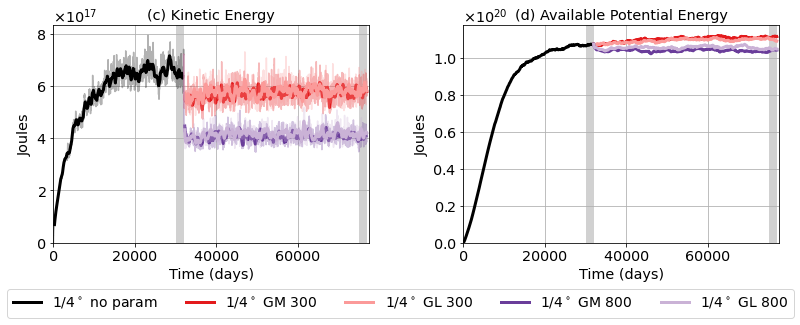

In [22]:
v = exps_param['nw2_0.25deg_N15_KHGL300_hbbl5']
v['label'] = r'1/4$^\circ$ GL 300'
v = exps_param['nw2_0.25deg_N15_KHGL800_hbbl5']
v['label'] = r'1/4$^\circ$ GL 800'
v = exps_param['nw2_0.25deg_N15_KHTH800']
v['label'] = r'1/4$^\circ$ GM 800'
v = exps_unparam['nw2_0.25deg_N15_baseline_hmix20']
v['label'] = r'1/4$^\circ$ no param'

colorlist = ['k', '#e31a1c', '#fb9a99', '#6a3d9a','#cab2d6', ]

vlist = [
    exps_unparam['nw2_0.25deg_N15_baseline_hmix20'],
    exps_param['nw2_0.25deg_N15_KHTH300'],
    exps_param['nw2_0.25deg_N15_KHGL300_hbbl5'],
    exps_param['nw2_0.25deg_N15_KHTH800'],
    exps_param['nw2_0.25deg_N15_KHGL800_hbbl5'],
]

maxtime = 77000
intertime = 32000
abc_list = ['(c)', '(d)']

fig = plot_spinup(vlist, colorlist, abc_list=abc_list, maxtime=maxtime, intertime=intertime, ncol=5, compute_energy_levels=True)
figname = '/glade/u/home/noraloose/GL90_paper/figures/spinup_0.25degree.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

In [20]:
5.88242e+17 / 5.78916e+17  # KE ratio 300

1.0161094182921184

In [21]:
1.09834e+20 / 1.1131e+20  # APE ratio 300

0.9867397358727877

In [22]:
4.16508e+17 / 4.03461e+17  # KE ratio 800

1.0323376980674712

In [23]:
1.04822e+20 / 1.0408e+20  # APE ratio 800

1.0071291314373558

### 1/4 degree appendix

_none
KE: nan
APE: nan
1/4$^\circ$ GM 300 $\cdot\, \phi(z)$
KE: 6.3666e+17
APE: 1.00702e+20
1/4$^\circ$ GL 300 $\cdot\, \phi(z)$
KE: 6.54019e+17
APE: 1.00361e+20
1/4$^\circ$ GM 300 $\cdot\, \psi(y)$
KE: 4.05145e+17
APE: 1.00635e+20
1/4$^\circ$ GL 300 $\cdot\, \psi(y)$
KE: 3.99996e+17
APE: 9.8436e+19


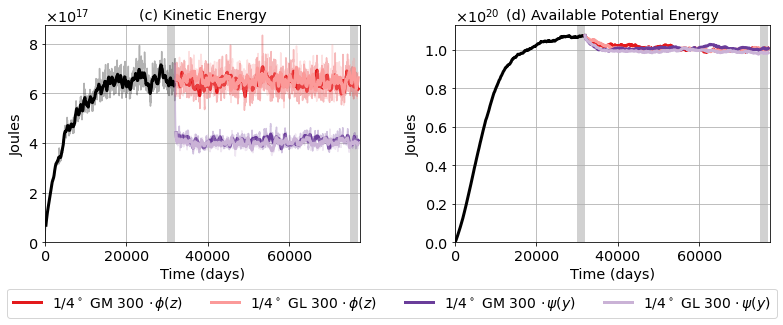

In [23]:
v = exps_param['nw2_0.25deg_N15_EBT_KHGL300_hbbl5']
v['label'] = r'1/4$^\circ$ GL 300 $\cdot\, \phi(z)$'
v = exps_param['nw2_0.25deg_N15_EBT_KHTH300']
v['label'] = r'1/4$^\circ$ GM 300 $\cdot\, \phi(z)$'
v = exps_unparam['nw2_0.25deg_N15_baseline_hmix20']
v['label'] = '_none'

v = exps_param['nw2_0.25deg_N15_KHGL300_vary_hbbl5']
v['label'] = r'1/4$^\circ$ GL 300 $\cdot\, \psi(y)$'
v = exps_param['nw2_0.25deg_N15_KHTH300_vary']
v['label'] = r'1/4$^\circ$ GM 300 $\cdot\, \psi(y)$'

colorlist = ['k', '#e31a1c', '#fb9a99', '#6a3d9a','#cab2d6', ]

vlist = [
    exps_unparam['nw2_0.25deg_N15_baseline_hmix20'],
    exps_param['nw2_0.25deg_N15_EBT_KHTH300'],
    exps_param['nw2_0.25deg_N15_EBT_KHGL300_hbbl5'],
    exps_param['nw2_0.25deg_N15_KHTH300_vary'],
    exps_param['nw2_0.25deg_N15_KHGL300_vary_hbbl5']  
]

maxtime = 77000
intertime = 32000
abc_list = ['(c)', '(d)']

fig = plot_spinup(vlist, colorlist, abc_list=abc_list, maxtime=maxtime, intertime=intertime, ncol=4, compute_energy_levels=True)
figname = '/glade/u/home/noraloose/GL90_paper/figures/spinup_0.25degree_appendix.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

In [25]:
6.54019e+17 / 6.3666e+17  # KE ratio 300 EBT

1.0272657305312098

In [26]:
1.00361e+20 / 1.00702e+20  # APE ratio 300 EBT

0.9966137713252964

In [27]:
3.99996e+17 / 4.05145e+17  # KE ratio 300 vary

0.9872909698996656

In [28]:
9.8436e+19 / 1.00635e+20  # APE ratio 300 vary

0.9781487554031898

### 1/8 degree main text

1/8$^\circ$ no param
KE: nan
APE: nan
1/8$^\circ$ GM 100
KE: 1.25577e+18
APE: 9.9183e+19
1/8$^\circ$ GL 100
KE: 1.25145e+18
APE: 9.776e+19
1/8$^\circ$ GM 800
KE: 5.44391e+17
APE: 9.48372e+19
1/8$^\circ$ GL 800
KE: 5.39716e+17
APE: 9.56162e+19


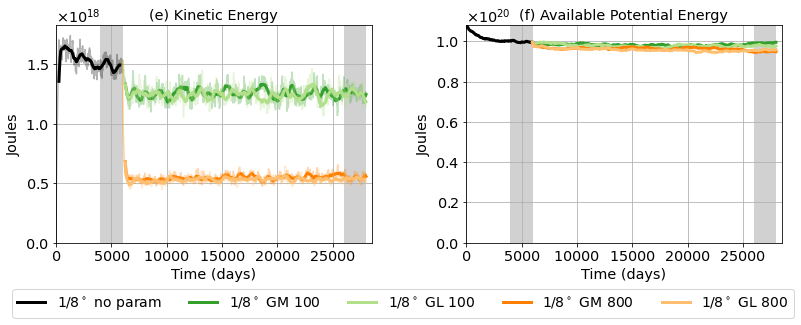

In [25]:
v = exps_param['nw2_0.125deg_N15_KHGL100_hbbl5']
v['label'] = r'1/8$^\circ$ GL 100'
v = exps_param['nw2_0.125deg_N15_KHGL800_hbbl5']
v['label'] = r'1/8$^\circ$ GL 800'
v = exps_param['nw2_0.125deg_N15_KHTH100']
v['label'] = r'1/8$^\circ$ GM 100'
v = exps_param['nw2_0.125deg_N15_KHTH800']
v['label'] = r'1/8$^\circ$ GM 800'
v = exps_unparam['nw2_0.125deg_N15_baseline_hmix20']
v['label'] = '1/8$^\circ$ no param'

colorlist = ['k', '#33a02c', '#b2df8a','#ff7f00',  '#fdbf6f']

vlist = [
    exps_unparam['nw2_0.125deg_N15_baseline_hmix20'],
    exps_param['nw2_0.125deg_N15_KHTH100'],
    exps_param['nw2_0.125deg_N15_KHGL100_hbbl5'],
    exps_param['nw2_0.125deg_N15_KHTH800'],
    exps_param['nw2_0.125deg_N15_KHGL800_hbbl5']
]

maxtime = 28000
intertime = 6000
abc_list = ['(e)', '(f)']

fig = plot_spinup(vlist, colorlist, abc_list=abc_list, maxtime=maxtime, intertime=intertime, ncol=5, compute_energy_levels=True)
figname = '/glade/u/home/noraloose/GL90_paper/figures/spinup_0.125degree.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

In [38]:
1.25145e+18 / 1.25577e+18  # KE ratio 100

0.9965598795957858

In [37]:
9.776e+19 / 9.9183e+19  # APE ratio 100

0.9856527832390631

### 1/8 degree appendix

_none
KE: nan
APE: nan
1/8$^\circ$ GM 100 $\cdot\, \phi(z)$
KE: 1.32504e+18
APE: 9.5e+19
1/8$^\circ$ GL 100 $\cdot\, \phi(z)$
KE: 1.30604e+18
APE: 9.52876e+19
1/8$^\circ$ GM 100 $\cdot\, \psi(y)$
KE: 1.07096e+18
APE: 9.70912e+19
1/8$^\circ$ GL 100 $\cdot\, \psi(y)$
KE: 1.05913e+18
APE: 9.70108e+19


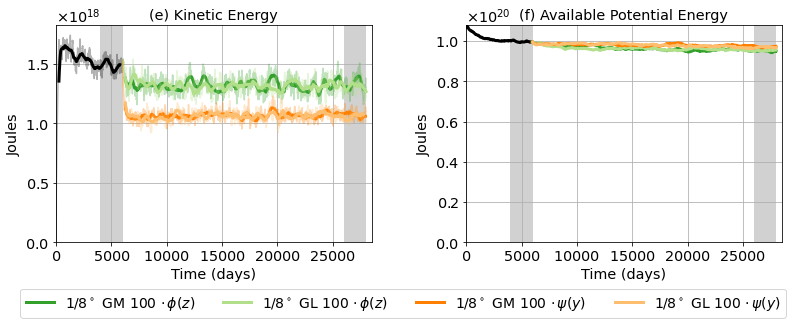

In [27]:
v = exps_param['nw2_0.125deg_N15_EBT_KHGL100_hbbl5']
v['label'] = r'1/8$^\circ$ GL 100 $\cdot\, \phi(z)$'
v = exps_param['nw2_0.125deg_N15_KHGL100_vary_hbbl5']
v['label'] = r'1/8$^\circ$ GL 100 $\cdot\, \psi(y)$'
v = exps_param['nw2_0.125deg_N15_EBT_KHTH100']
v['label'] = r'1/8$^\circ$ GM 100 $\cdot\, \phi(z)$'
v = exps_param['nw2_0.125deg_N15_KHTH100_vary']
v['label'] = r'1/8$^\circ$ GM 100 $\cdot\, \psi(y)$'
v = exps_unparam['nw2_0.125deg_N15_baseline_hmix20']
v['label'] = '_none'

colorlist = ['k', '#33a02c', '#b2df8a','#ff7f00',  '#fdbf6f']

vlist = [
    exps_unparam['nw2_0.125deg_N15_baseline_hmix20'],
    exps_param['nw2_0.125deg_N15_EBT_KHTH100'],
    exps_param['nw2_0.125deg_N15_EBT_KHGL100_hbbl5'],
    exps_param['nw2_0.125deg_N15_KHTH100_vary'],
    exps_param['nw2_0.125deg_N15_KHGL100_vary_hbbl5']
]

maxtime = 28000
intertime = 6000
abc_list = ['(e)', '(f)']

fig = plot_spinup(vlist, colorlist, abc_list=abc_list, maxtime=maxtime, intertime=intertime, ncol=4, compute_energy_levels=True)
figname = '/glade/u/home/noraloose/GL90_paper/figures/spinup_0.125degree_appendix.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

In [33]:
1.30604e+18 / 1.32504e+18  # KE ratio 100 EBT

0.9856608102396909

In [34]:
9.52876e+19 / 9.5e+19  # APE ratio 100 EBT

1.0030273684210527

In [35]:
1.05913e+18 / 1.07096e+18  # KE ratio 100 vary

0.9889538358108613

In [36]:
9.70108e+19 / 9.70912e+19  # APE ratio 100 vary

0.9991719125935203